# Callgraph Magic Examples

This notebook shows examples of the [callgraph](https://github.com/osteele/callgraph) IPython extension. You can also use `?callgraph` in Jupyter to see documentation.

## Installation

Load the extension:

In [1]:
%load_ext callgraph

This depends on the callgraph package having been installed, via `pip install callgraph` or otherwise.

See the package documentation for an alternative to including `%load_ext callgraph` in each notebook that uses `%callgraph`.


## Examples

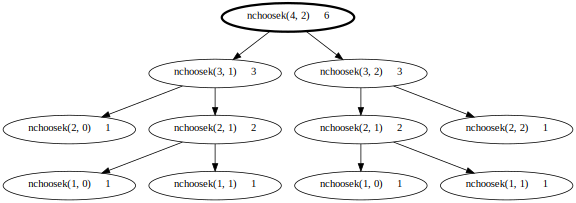

In [2]:
def nchoosek(n, k):
    if k == 0:
        return 1
    if n == k:
        return 1
    return nchoosek(n - 1, k - 1) + nchoosek(n - 1, k)

%callgraph -w8 nchoosek(4, 2)

[`lru_cache`](https://docs.python.org/3/library/functools.html#functools.lru_cache) caches (“[memoizes](https://en.wikipedia.org/wiki/Memoization)”) calls to `nchoosek`. Contrast the call graph above, where `nchoosek(1, 0)` , `nchoosek(1, 1)` , and `nchoosek(2, 1)` are each executed twice, to the following:

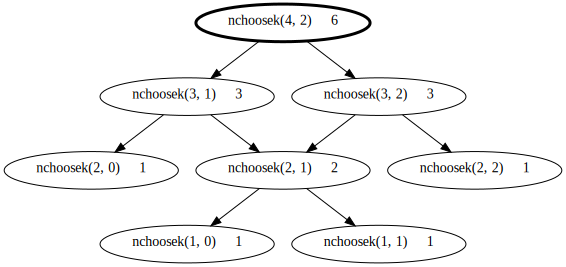

In [3]:
from functools import lru_cache

@lru_cache()
def nchoosek(n, k):
    if k == 0:
        return 1
    if n == k:
        return 1
    return nchoosek(n - 1, k - 1) + nchoosek(n - 1, k)

%callgraph -w8 nchoosek(4, 2)

Here's another recursive function. The [Levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance), or “edit distance”, counts the number of additions, removals, and single-character changes to transform one string into another.

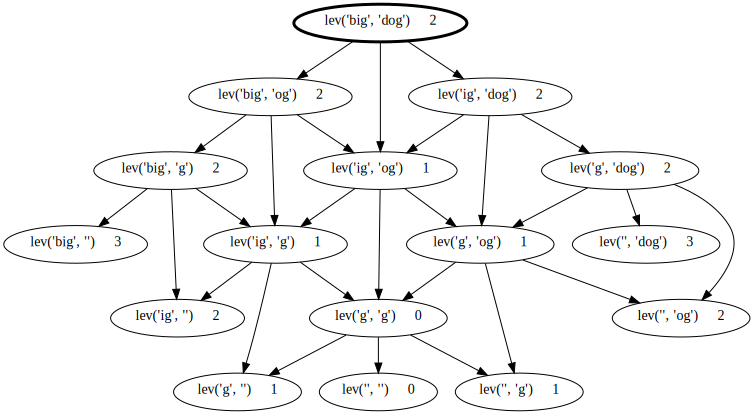

In [4]:
@lru_cache()
def lev(a, b):
    if "" in (a, b):
        return len(a) + len(b)

    candidates = []
    if a[0] == b[0]:
        candidates.append(lev(a[1:], b[1:]))
    else:
        candidates.append(lev(a[1:], b[1:]) + 1)
    candidates.append(lev(a, b[1:]) + 1)
    candidates.append(lev(a[1:], b) + 1)
    return min(candidates)

%callgraph lev("big", "dog")

`%callgraph` accepts multiple statements. Here, we can see how computation results are re-used between statements.

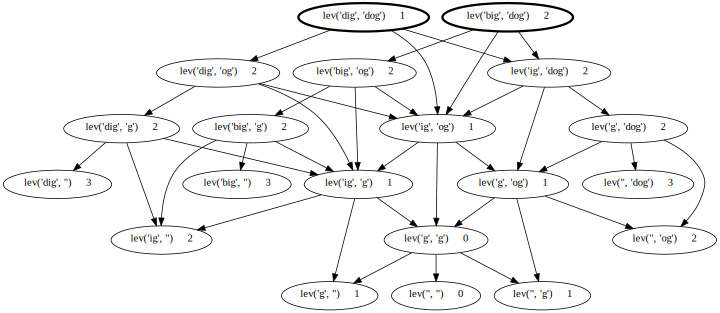

In [5]:
%callgraph -w10 lev("big", "dog"); lev("dig", "dog")

## Options

`-w` sets the maximum width of the graph:

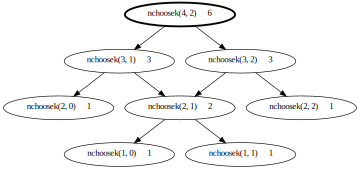

In [6]:
%callgraph -w5 nchoosek(4, 2)

`-h` turns the graph sideways. It displays functions calls as *horizontal* arrows:

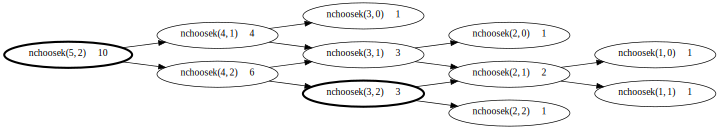

In [7]:
%callgraph -w10 -h nchoosek(5, 2); nchoosek(3, 2)

Use `-r` to *reverse* the arrows, and label them with *return* values:

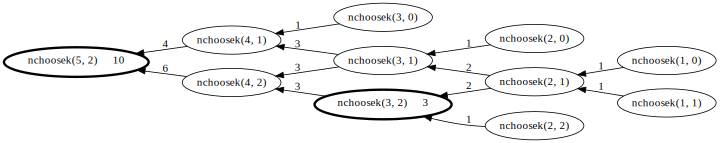

In [8]:
%callgraph -w10 -hr nchoosek(5, 2); nchoosek(3, 2)

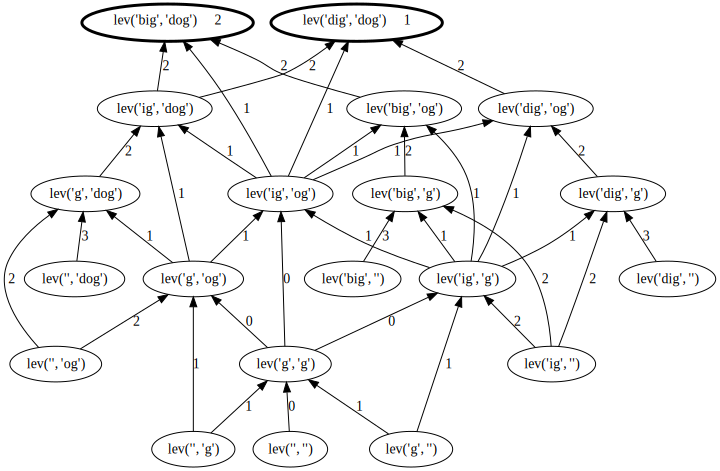

In [9]:
%callgraph -w10 -r lev("big", "dog"); lev("dig", "dog")

By default, `%callgraph` clears the cache of any function that has been decorated via `lru_cache`. The `--no-clear` options disables this:

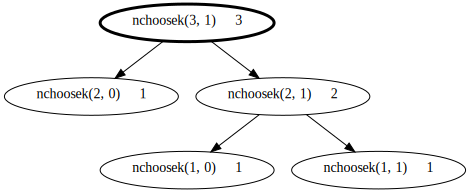

In [10]:
%callgraph nchoosek(3, 1)

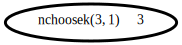

In [11]:
%callgraph --no-clear nchoosek(3, 1)